In [2]:
import os, sys, glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data_path = '/media/yeok/OS/projects_data/papers-graph/data/'
pdfs = glob.glob(data_path + '/*/*.pdf')
csvs = glob.glob(data_path + '*.csv')

print(len(pdfs), 'Examples:', pdfs[:10])
print(len(csvs), 'Examples:', csvs[:10])

72640 Examples: ['/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18431v1.GeAR__Graph_enhanced_Agent_for_Retrieval_augmented_Generation.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18440v1.Unlocking_the_Potential_of_Multiple_BERT_Models_for_Bangla_Question_Answering_in_NCTB_Textbooks.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18443v1.Is_Large_Language_Model_Good_at_Triple_Set_Prediction__An_Empirical_Study.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18487v1.Segment_Based_Attention_Masking_for_GPTs.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18495v1.How__Real__is_Your_Real_Time_Simultaneous_Speech_to_Text_Translation_System_.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18496v1.Generating_event_descriptions_under_syntactic_and_semantic_constraints.pdf', '/media/yeok/OS/projects_data/papers-graph/data/2024-12-29/2412.18497v1.Think_or_Remember__Det

In [17]:
# For each csv eg 2014-03-07.csv, add a column 'pdf' with the corresponding pdf file
# The pdf's filename contains the id column in the csv but also contains other words, so a string match is necessary
for csv in csvs:
    df = pd.read_csv(csv)
    id = os.path.basename(csv).split('.')[0]
    for pdf in pdfs:
        if id in pdf:
            df['pdf'] = pdf
            break    
    df.to_csv(csv, index=False)

In [19]:
# Concatenate all CSV data into a DataFrame and remove duplicates by only taking the newest date
df = pd.concat([pd.read_csv(csv) for csv in csvs])
df = df.sort_values('updated').drop_duplicates('doi', keep='last')
print(df.shape)
print(df.columns)
print(df.head())

(6238, 11)
Index(['id', 'title', 'categories', 'abstract', 'doi', 'created', 'updated',
       'authors', 'downloaded', 'remarks', 'pdf'],
      dtype='object')
                   id                                              title  \
64         cs/0006023  dialogue act modeling for automatic tagging an...   
105  cond-mat/0203227  ising model on networks with an arbitrary dist...   
18   quant-ph/0309022  quantum aspects of semantic analysis and symbo...   
45         cs/0701047          on vocabulary size of grammar-based codes   
0           0710.4516   the predictability of letters in written english   

                                            categories  \
64                                               cs.cl   
105  cond-mat.stat-mech cs.ni hep-lat hep-th math-p...   
18                                      quant-ph cs.cl   
45                                 cs.it cs.cl math.it   
0                         physics.soc-ph cs.cl stat.ml   

                                 

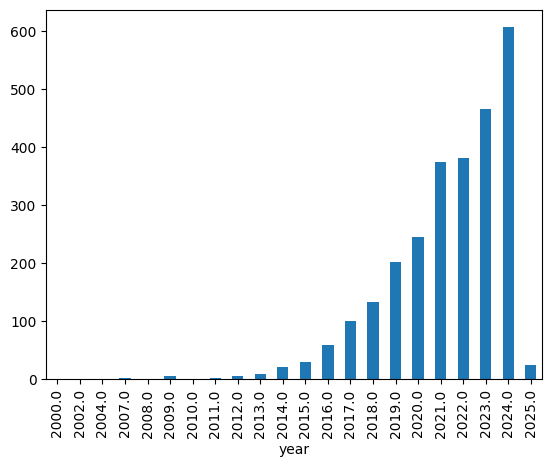

In [20]:
# Display the number of papers per year
df['updated'] = pd.to_datetime(df['updated'])
df['year'] = df['updated'].dt.year
df['year'].value_counts().sort_index().plot(kind='bar')
plt.show()


In [ ]:
import sys, glob
sys.path.append('/home/yeok/projects/xtr-warp/marker')
from marker.converters.pdf import PdfConverter
from marker.models import create_model_dict
from marker.output import text_from_rendered


# Make df with only papers with corresponding files (file name contains doi)
df = df[df['downloaded']==True]

# For each pdf, extract the text and save it in a .md file with the same name
converter = PdfConverter(   
    artifact_dict=create_model_dict(),
)

def pdf_to_md(pdf_path):
    rendered = converter(pdf_path)
    text, _, images = text_from_rendered(rendered)
    md_path = pdf_path.replace('.pdf', '.md')
    with open(md_path, 'w') as f:
        f.write(text)
    return md_path

# for every pdf, convert it to md and add the path to the df with tqdm
from tqdm import tqdm
tqdm.pandas()

# df['md'] = df['pdf'].progress_apply(pdf_to_md) # Can't rly catch errors
ERROR_LIST = []
# Instead, use this
for i, row in tqdm(df.iterrows(), total=len(df)):
    pdf_path = row['pdf']
    md_path = pdf_path.replace('.pdf', '.md')
    if not os.path.exists(md_path):
        try:
            pdf_to_md(pdf_path)
        except Exception as e:
            ERROR_LIST.append((pdf_path, e))
            # break

Loaded layout model datalab-to/surya_layout on device cuda with dtype torch.float16
Loaded texify model datalab-to/texify on device cuda with dtype torch.float16
Loaded recognition model vikp/surya_rec2 on device cuda with dtype torch.float16
Loaded table recognition model datalab-to/surya_tablerec on device cuda with dtype torch.float16
Loaded detection model vikp/surya_det3 on device cuda with dtype torch.float16


100%|██████████| 2/2 [00:00<00:00, 168.07it/s]
Detecting bboxes: 0it [00:00, ?it/s]


Texify inference: 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]


Texify inference: 100%|██████████| 1/1 [00:00<00:00,  1.23it/s]


Texify inference: 100%|██████████| 1/1 [00:00<00:00,  1.78it/s]


Recognizing equations: 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]
Detecting bboxes: 0it [00:00, ?it/s]
100%|██████████| 3/3 [00:00<00:00, 115.62it/s]
Detecting bboxes: 0it [00:00, ?it/s]
Token indices sequence length is longer than the specified maximum sequence length for this model (1133 > 768). Running this sequence through the model will result in indexing errors


Texify inference: 100%|██████████| 1/1 [00:01<00:00,  1.19s/it]


Texify inference: 100%|██████████| 1/1 [00:00<00:00,  1.08it/s]


Texify inference: 100%|██████████| 1/1 [00:02<00:00,  2.38s/it]


Texify inference: 100%|██████████| 1/1 [00:02<00:00,  2.95s/it]


Texify inference: 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]


Texify infe


/media/yeok/OS/projects_data/papers-graph/data/2014-10-03/1210.7599v2.The_automatic_creation_of_concept_maps_from_documents_written_using_morphologically_rich_languages.pdf


In [27]:
df['pdf']

0     /media/yeok/OS/projects_data/papers-graph/data...
0     /media/yeok/OS/projects_data/papers-graph/data...
0     /media/yeok/OS/projects_data/papers-graph/data...
0     /media/yeok/OS/projects_data/papers-graph/data...
0     /media/yeok/OS/projects_data/papers-graph/data...
                            ...                        
13    /media/yeok/OS/projects_data/papers-graph/data...
18    /media/yeok/OS/projects_data/papers-graph/data...
29    /media/yeok/OS/projects_data/papers-graph/data...
39    /media/yeok/OS/projects_data/papers-graph/data...
50    /media/yeok/OS/projects_data/papers-graph/data...
Name: pdf, Length: 6206, dtype: object

In [14]:
df

,id,title,categories,abstract,doi,created,updated,authors,downloaded,remarks,year,file
0,0710.4516,the predictability of letters in written english,physics.soc-ph cs.cl stat.ml,we show that the predictability of letters in ...,10.1142/s0218348x96000029,2007-10-24,2007-10-26,"['thomas schürmann', 'peter grassberger']",True,NaN,2007.0,None
0,809.036,the complexity of enriched mu-calculi,cs.lo cs.cl,the fully enriched &mu;-calculus is the extens...,10.2168/lmcs-4(3:11)2008,2008-09-02,2008-09-22,"['piero a. bonatti', 'carsten lutz', 'aniello ...",True,NaN,2008.0,None
0,0905.1235,the modular audio recognition framework (marf)...,cs.sd cs.cl cs.cv cs.mm cs.ne,marf is an open-source research platform and a...,10.1007/978-1-4020-8741-7_84 10.1007/978-3-540...,2009-05-08,2009-07-25,"['serguei a. mokhov', 'stephen sinclair', 'ian...",True,NaN,2009.0,None
0,810.3442,language structure in the n-object naming game,cs.cl cs.ma physics.soc-ph,we examine a naming game with two agents tryin...,10.1103/physreve.80.056107,2008-10-19,2009-11-21,"['adam lipowski', 'dorota lipowska']",True,NaN,2009.0,None
0,0711.4475,valence extraction using em selection and co-o...,cs.cl,this paper discusses two new procedures for ex...,10.1007/s10579-009-9100-5,2007-11-28,2009-11-27,['łukasz dębowski'],True,NaN,2009.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...
9,1612.05734,web-based semantic similarity for emotion reco...,cs.cl cs.ai cs.si,in this project we propose a new approach for ...,10.1145/2996890.3007883,2016-12-17,NaT,"['valentina franzoni', 'giulio biondi', 'alfre...",True,NaN,NaN,None
13,1701.02163,just an update on pming distance for web-based...,cs.ai cs.cl cs.ir math.pr,one of the main problems that emerges in the c...,10.13140/rg.2.2.20531.22560,2017-01-09,NaT,['valentina franzoni'],True,NaN,NaN,None
18,1701.02925,question analysis for arabic question answerin...,cs.cl,the first step of processing a question in que...,10.5121/ijnlc.2016.5603,2017-01-11,NaT,"['waheeb ahmed', 'dr. anto p babu']",True,NaN,NaN,None
29,2004.06303,quantifying community characteristics of mater...,cs.cl cs.cy cs.si,while most mortality rates have decreased in t...,10.1145/3366423.3380066,2020-04-14,NaT,"['rediet abebe', 'salvatore giorgi', 'anna ted...",True,NaN,NaN,None
